In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import tilemapbase
import pyproj
tilemapbase.start_logging()

40.44694705960049
40.847060356071225


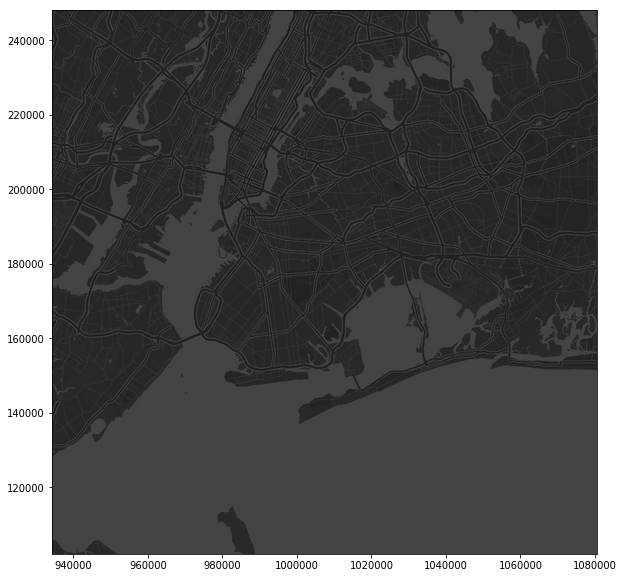

In [44]:
import matplotlib.pyplot as plt

import geopandas as gpd
import tilemapbase
import pyproj
import PIL.Image as _Image

fig, ax = plt.subplots(figsize=(10,10))
zoom = 11
EPSG=2263 # projection
topleft =  (40.75, -74.01)
botright = (40.58, -73.79)

def bounds(plotter, epsg):
    epsg_proj = pyproj.Proj(init='epsg:%d' % epsg, preserve_units=True)
    epsg_3857 = pyproj.Proj(init='epsg:%d' % tilemapbase.mapping._WEB_MERCATOR)
    self = plotter
    scale = 2 ** self.zoom
    x0, y0 = self.xtilemin / scale, self.ytilemin / scale # in tile space
    x1, y1 = (self.xtilemax + 1) / scale, (self.ytilemax + 1) / scale
    x0_ll, y0_ll = tilemapbase.to_lonlat(x0, y0)
    x1_ll, y1_ll = tilemapbase.to_lonlat(x1, y1)
    y0_ll, y1_ll = y1_ll, y0_ll # for some reason that I don't understand
    print(y0_ll)
    print(y1_ll)
    x0_epsg, y0_epsg = epsg_proj(x0_ll, y0_ll)
    x1_epsg, y1_epsg = epsg_proj(x1_ll, y1_ll)
    return x0_epsg, x1_epsg, y0_epsg, y1_epsg

def brighten(img, factor):
    # split the image into individual bands
    source = img.split()
    R, G, B, A = 0, 1, 2, 3

    # process each band separately
    out_R = source[R].point(lambda x: min(x+factor, 256))
    out_G = source[G].point(lambda x: min(x+factor, 256))
    out_B = source[B].point(lambda x: min(x+factor, 256))

    # build a new multiband image
    brightened = _Image.merge(img.mode, (out_R, out_G, out_B, source[A]))
    return brightened

tilemapbase.start_logging()
tilemapbase.init("/Users/imolk/tmp/tilemapbase.cache", create=True)

extent = tilemapbase.Extent.from_lonlat(topleft[1], botright[1],
                  botright[0], topleft[0])
plotter_ln = tilemapbase.Plotter(extent,tilemapbase.tiles.Carto_Dark_No_Labels, zoom=zoom)
plotter = plotter_ln
tile = brighten(plotter.as_one_image(), 30)
ax.imshow(tile, interpolation="lanczos", extent=bounds(plotter, EPSG), origin="upper", zorder=-9)

40.44694705960049
40.847060356071225


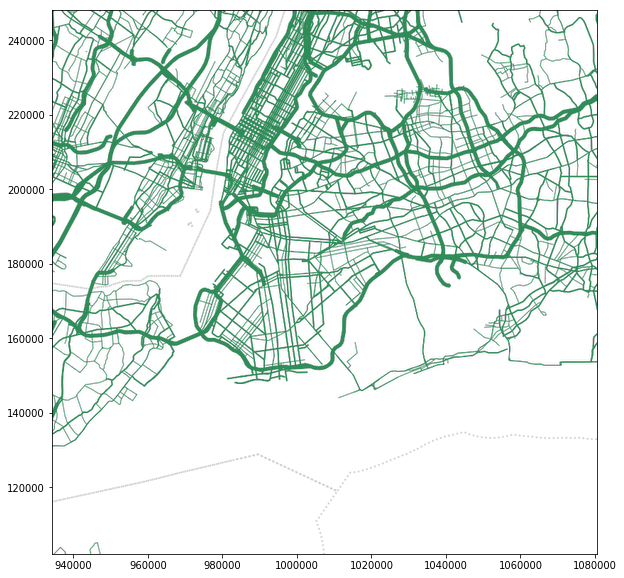

In [7]:
import matplotlib.pyplot as plt

import geopandas as gpd
import tilemapbase
import pyproj
import PIL.Image as _Image

fig, ax = plt.subplots(figsize=(10,10))
zoom = 11
EPSG=2263 # projection
topleft =  (40.75, -74.01)
botright = (40.58, -73.79)

def bounds(plotter, epsg):
    epsg_proj = pyproj.Proj(init='epsg:%d' % epsg, preserve_units=True)
    epsg_3857 = pyproj.Proj(init='epsg:%d' % tilemapbase.mapping._WEB_MERCATOR)
    self = plotter
    scale = 2 ** self.zoom
    x0, y0 = self.xtilemin / scale, self.ytilemin / scale # in tile space
    x1, y1 = (self.xtilemax + 1) / scale, (self.ytilemax + 1) / scale
    x0_ll, y0_ll = tilemapbase.to_lonlat(x0, y0)
    x1_ll, y1_ll = tilemapbase.to_lonlat(x1, y1)
    y0_ll, y1_ll = y1_ll, y0_ll # for some reason that I don't understand
    print(y0_ll)
    print(y1_ll)
    x0_epsg, y0_epsg = epsg_proj(x0_ll, y0_ll)
    x1_epsg, y1_epsg = epsg_proj(x1_ll, y1_ll)
    return x0_epsg, x1_epsg, y0_epsg, y1_epsg

def brighten(img, factor):
    # split the image into individual bands
    source = img.split()
    R, G, B, A = 0, 1, 2, 3

    # process each band separately
    out_R = source[R].point(lambda x: min(x+factor, 256))
    out_G = source[G].point(lambda x: min(x+factor, 256))
    out_B = source[B].point(lambda x: min(x+factor, 256))

    # build a new multiband image
    new_im = _Image.merge(img.mode, (out_R, out_G, out_B, source[A]))
    return new_im
    
def makecolor(img, rgb):
    # split the image into individual bands
    source = img.split()
    R, G, B, A = 0, 1, 2, 3

    # process each band separately
    out_R = source[R].point(lambda x: rgb[0])
    out_G = source[G].point(lambda x: rgb[1])
    out_B = source[B].point(lambda x: rgb[2])

    # build a new multiband image
    new_im = _Image.merge(img.mode, (out_R, out_G, out_B, source[A]))
    return new_im

tilemapbase.start_logging()
tilemapbase.init("/Users/imolk/tmp/tilemapbase.cache", create=True)

extent = tilemapbase.Extent.from_lonlat(topleft[1], botright[1],
                  botright[0], topleft[0])
plotter_ln = tilemapbase.Plotter(extent,tilemapbase.tiles.Stamen_Terrain_Lines, zoom=zoom)
plotter = plotter_ln
tile = makecolor(plotter.as_one_image(), (230, 230, 230))
ax.imshow(tile, interpolation="lanczos", extent=bounds(plotter, EPSG), origin="upper", zorder=-9)

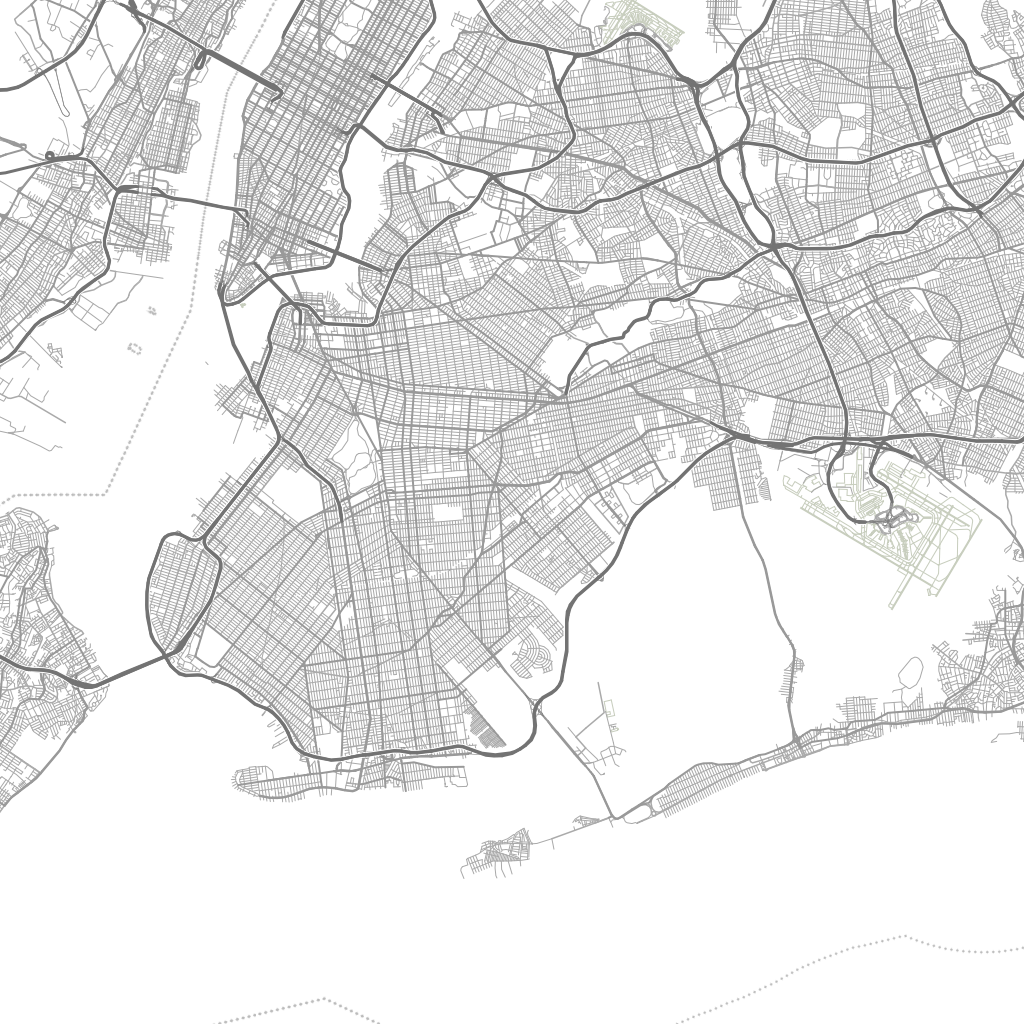

In [22]:
tile

In [36]:
??tilemapbase.init

In [25]:
import PIL.Image as _Image

In [29]:
import PIL.ImageEnhance

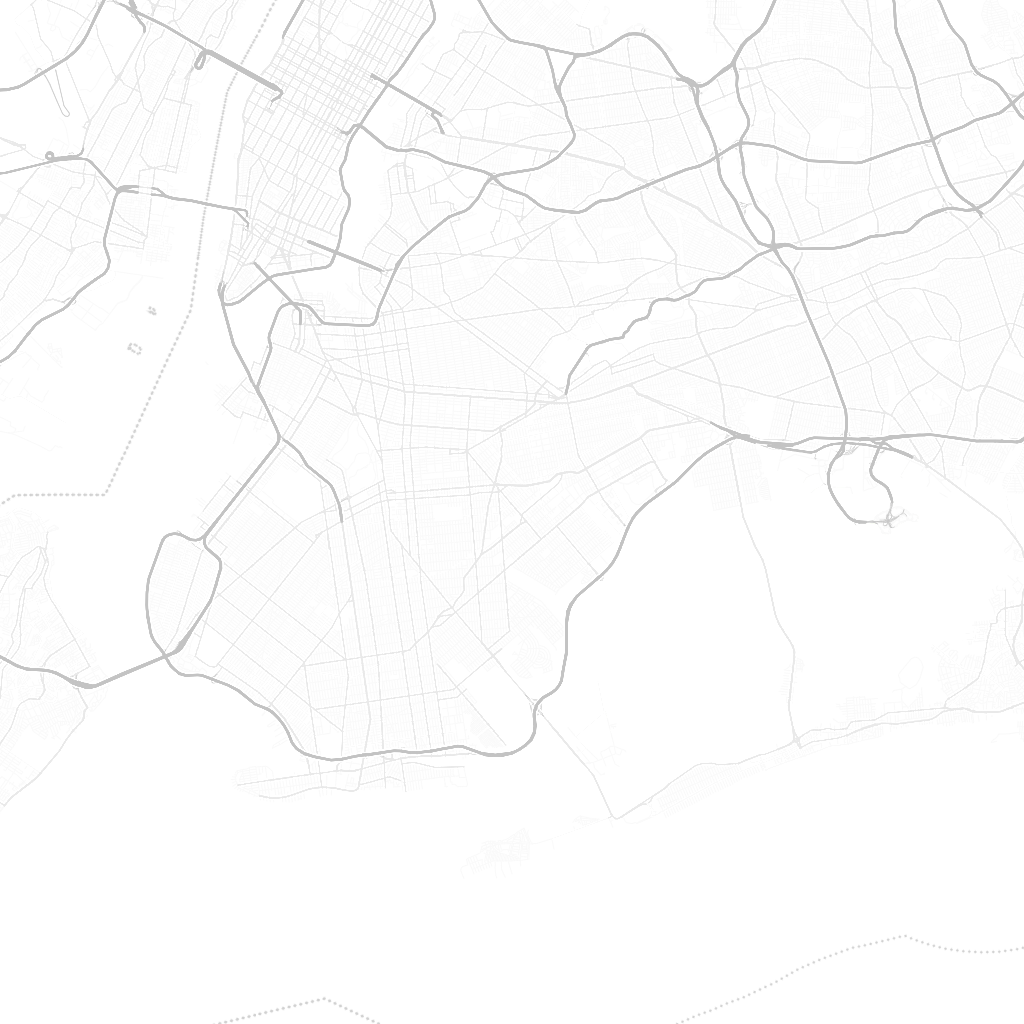

In [33]:
def brighten(img, factor):
    # split the image into individual bands
    source = img.split()
    R, G, B, A = 0, 1, 2, 3

    # process each band separately
    out_R = source[R].point(lambda x: min(x+factor, 256))
    out_G = source[G].point(lambda x: min(x+factor, 256))
    out_B = source[B].point(lambda x: min(x+factor, 256))

    # build a new multiband image
    brightened = _Image.merge(img.mode, (out_R, out_G, out_B, source[A]))
    return brightened

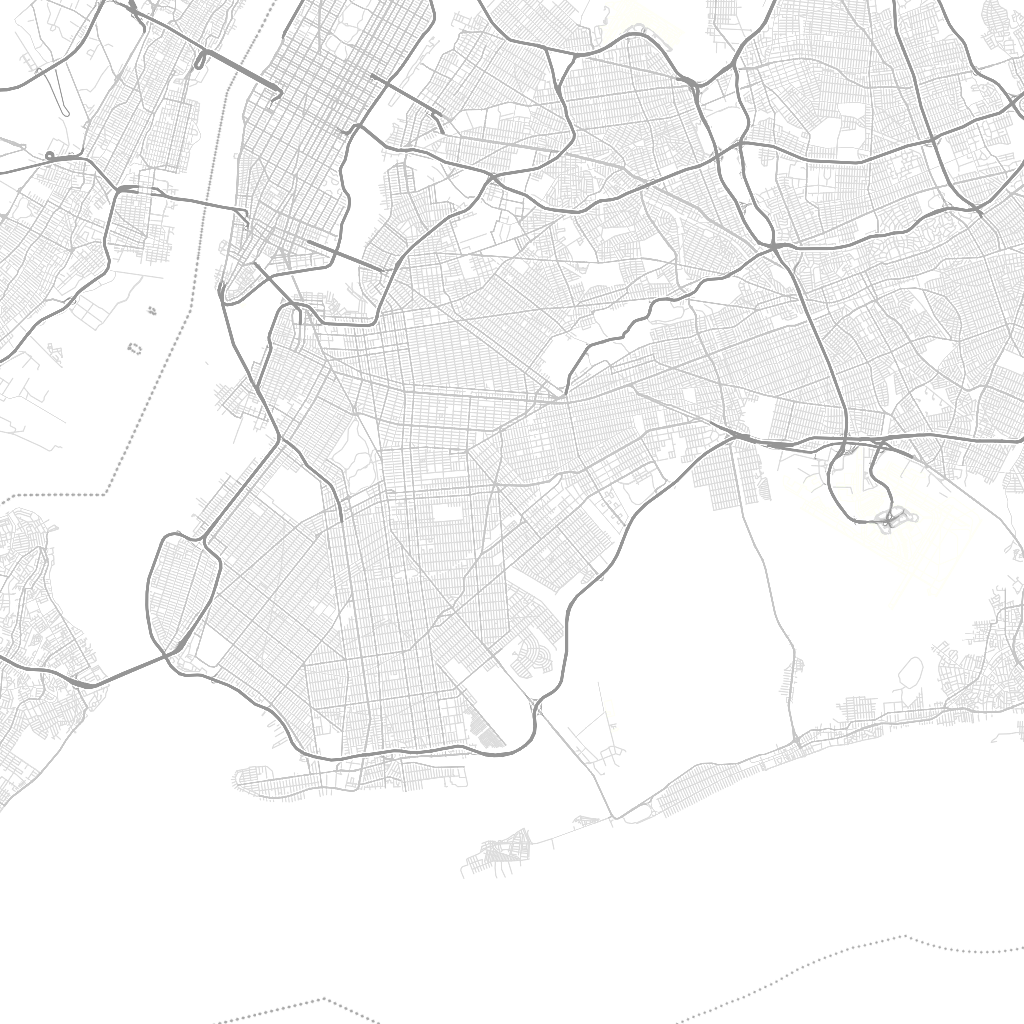

In [11]:
tile.point(lambda x: x*1.1)

In [2]:
tilemapbase.init("/Users/imolk/tmp/tilemapbase.cache", create=True)

In [6]:
topleft = (40.787870, -74.070671)
botright = (40.582861, -73.792014)
extent = tilemapbase.Extent.from_lonlat(topleft[1], botright[1],
                  botright[0], topleft[0])
extent._project_str = "epsg:3857"
extent.project = extent._3857_project

In [33]:
EPSG=2263
epsg_proj = pyproj.Proj(init='epsg:%d' % EPSG, preserve_units=True)

In [34]:
"""
Calling a Proj class instance with the arguments lon, lat will
        convert lon/lat (in degrees) to x/y native map projection
        coordinates (in meters).
"""
topleft_epsg = epsg_proj(topleft[1], topleft[0]) # 
botright_epsg = epsg_proj(botright[1], botright[0])

In [37]:
?ax.imshow

In [41]:
?plt.imshow

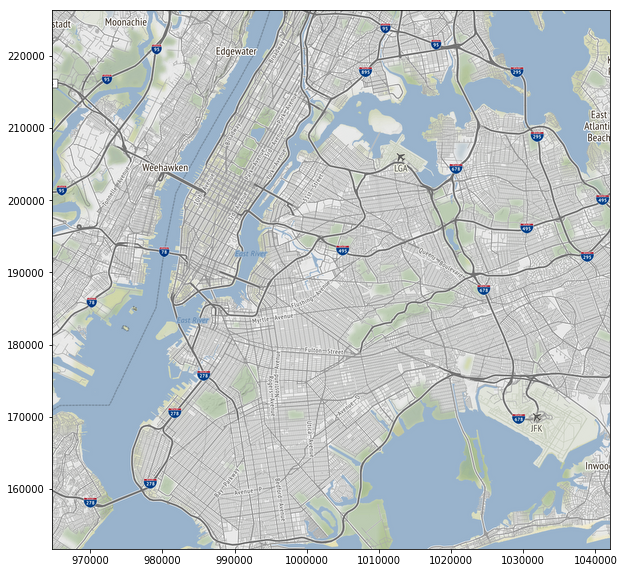

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

plotter_tr = tilemapbase.Plotter(extent,tilemapbase.tiles.Stamen_Terrain, zoom=12)
tile = plotter_tr.as_one_image()
x0, y1 = topleft_epsg
x1, y0 = botright_epsg
ax.imshow(tile, interpolation="lanczos", extent=(x0,x1,y0,y1), origin="upper")

None

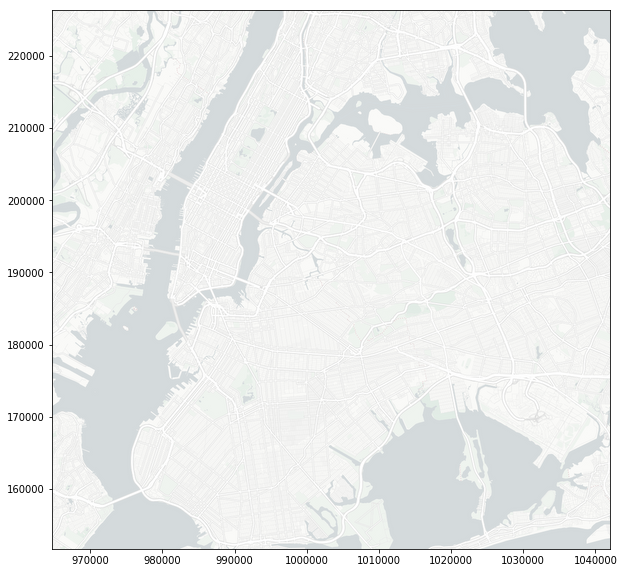

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

plotter_tr = tilemapbase.Plotter(extent,tilemapbase.tiles.Carto_Light_No_Labels, zoom=12)
tile = plotter_tr.as_one_image()
x0, y1 = topleft_epsg
x1, y0 = botright_epsg
ax.imshow(tile, interpolation="lanczos", extent=(x0,x1,y0,y1), origin="upper")
None

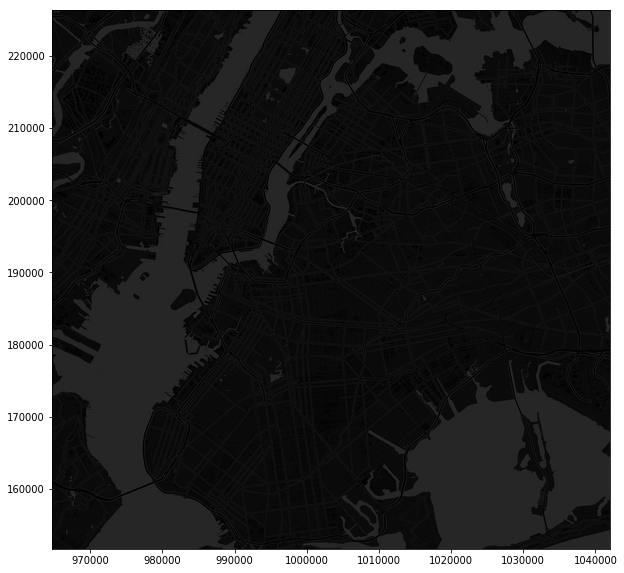

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

plotter_tr = tilemapbase.Plotter(extent,tilemapbase.tiles.Carto_Dark_No_Labels, zoom=13)
tile = plotter_tr.as_one_image()
x0, y1 = topleft_epsg
x1, y0 = botright_epsg
ax.imshow(tile, interpolation="lanczos", extent=(x0,x1,y0,y1), origin="upper")
None

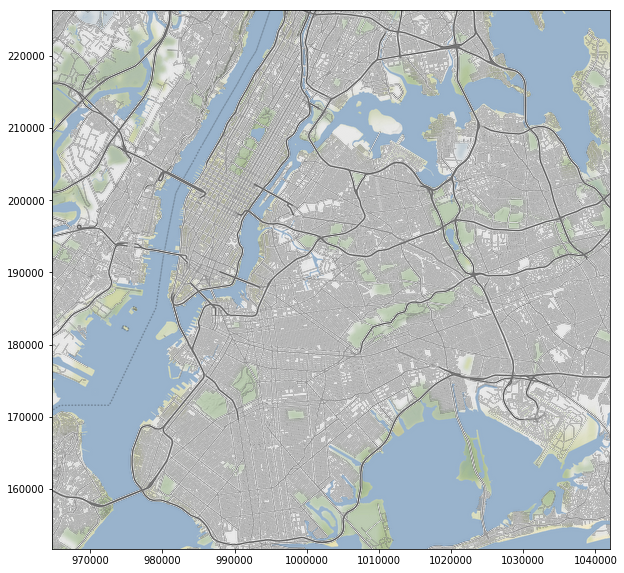

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

plotter_bg = tilemapbase.Plotter(extent,tilemapbase.tiles.Stamen_Terrain_Background, zoom=12)
plotter_ln = tilemapbase.Plotter(extent,tilemapbase.tiles.Stamen_Terrain_Lines, zoom=12)
for plotter in (plotter_bg, plotter_ln):
    tile = plotter.as_one_image()
    x0, y1 = topleft_epsg
    x1, y0 = botright_epsg
    ax.imshow(tile, interpolation="lanczos", extent=(x0,x1,y0,y1), origin="upper")

None